# Verifying the Results of Compilation Flows

## Quantum Circuit Compilation

Initially, quantum algorithms are described in a way which is agnostic of the device they are planned to be executed on.
However, physical devices today impose several constraints on the circuits to be executed:

1. **Limited gate-set:** Typically, only a small set of gates is natively supported by devices, e.g., consisting of arbitrary single-qubit gates and the two-qubit CNOT operation.

2. **Limited connectivity:** Devices frequently limit the pairs of qubits that operations may be applied to. This is usually described by a coupling graph, where the graph's nodes represent the qubits and an edge between two nodes indicates that a CNOT operation may be applied to those qubits.

3. **Short coherence times and limited fidelity:** A device's physical qubits are inherently affected by noise. Until a certain threshold concerning the number of available qubits is reached, error correction is not yet an option.

The first two, i.e., the limited gate-set and connectivity, constitute hard constraints---a computation not conforming to these restrictions may not be executed on the device. In contrast, the short coherence time and limited gate fidelity represent soft constraints---a quantum circuit may be executed on a device, but it is not guaranteed to produce meaningful results if the circuit, e.g., is too large for the state to stay coherent.

Just as in classical computing, a conceptual algorithm needs to be compiled to the targeted architecture to address these constraints.
Throughout the compilation process, the gates and the structure of the underlying circuit is changed considerably.
The following figure exemplary illustrates the compilation of a 3-qubit circuit implementing the Grover search algorithm to the 5-qubit IBMQ London architecture.

<img src="images/compilation_flow.png" alt="Compilation of a quantum circuit" width="100%">

It is of utmost importance that, after compilation, the resulting (compiled) circuit still implements the same functionality as the originally given circuit.
This can be guaranteed by verifying the results of the compilation flow, i.e., checking the equivalence of the original circuit description with the compiled quantum circuit.

## Using QCEC to Verify Compilation Flow Results

First, construct your quantum circuit as usual.

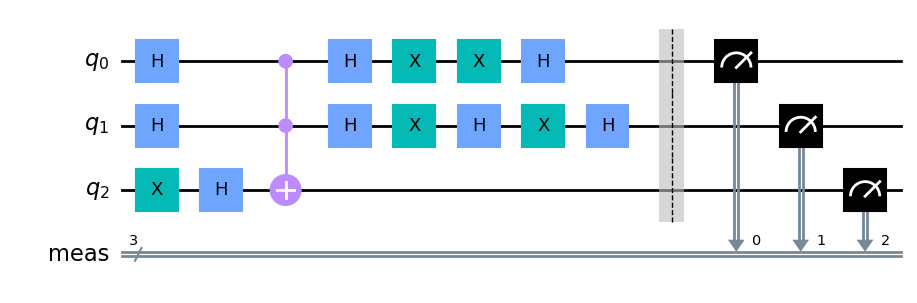

In [1]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(3)
circ.x(2)
circ.h(range(3))
circ.ccx(0, 1, 2)
circ.h(range(2))
circ.x(range(2))
circ.h(1)
circ.x(range(2))
circ.h(range(2))
circ.measure_all()
circ.draw(output='mpl')

Then, compile the circuit to the desired target architecture.

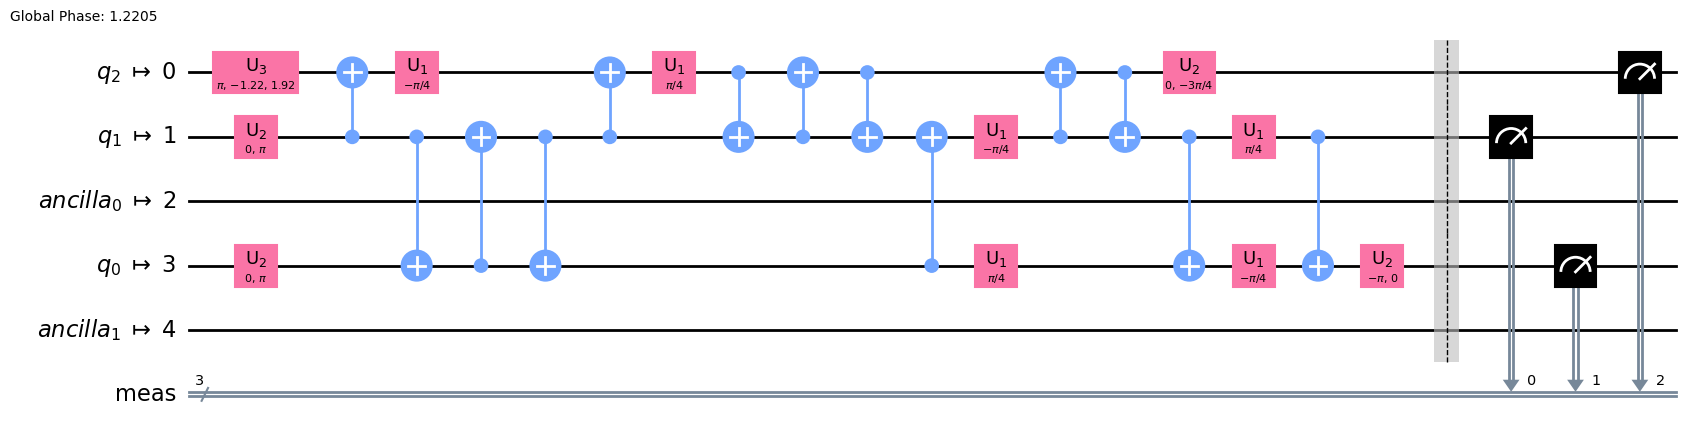

In [2]:
from qiskit import transpile
from qiskit.providers.fake_provider import FakeLondon

# compile circuit to 5-qubit London Architecture
optimization_level = 1
circ_comp = transpile(circ, backend=FakeLondon(), optimization_level=optimization_level)
circ_comp.draw(output='mpl')

Then, using QCEC to verify that the circuit has been compiled correctly is as easy as


In [3]:
from mqt import qcec

qcec.verify_compilation(circ, circ_comp, optimization_level=optimization_level)

{
  "check_time": 0.001005036,
  "equivalence": "equivalent_up_to_global_phase",
  "preprocessing_time": 0.000165896,
  "simulations": {
    "performed": 0,
    "started": 8
  }
}

Check out the [reference documentation](library/VerifyCompilation.rst#mqt.qcec.verify_compilation) for more information.